# Investigate Titanic Dataset

### **1. Introduction**

RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early morning of 15 April 1912, after colliding with an iceberg during her maiden voyage from Southampton to New York City. Of the 2,224 passengers and crew aboard, more than 1,500 died in the sinking, making it one of the deadliest commercial peacetime maritime disasters in modern history. 
Passengers and some crew members were evacuated in lifeboats and many of them were launched only partially loaded. There were not enought lifeboats for all the passangers and due to the ocean water temperature it was not possible to survive long time in the water.

As a side note on the night the Titanic sank, the recorded water temperature in the North Atlantic was registered at approx 30 degrees Fahrenheit. Water temperatures between 32 and 40 degrees Fahrenheit cause hypothermia, reducing body temperature below 95 degrees Fahrenheit. Hypothermia results in death within 30 to 90 minutes.

In [184]:
#Load image from url
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://upload.wikimedia.org/wikipedia/commons/e/e1/Titanic_under_construction.jpg", width=500, height=500, unconfined=True)

### 2. About the dataset


The dataset of study contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. The variables included are:

In this project i will asses which factors had influence on chances of survival of the passangers. In my analysis i will take into the consideration data such as: age, cabin, location where the passanger embarked, sex. After assesing the data i will try to answer following questions?

* It's true in this case the phrase 'women and children first'? Did woman and children had higher chance of survival?
*  Did the survival chance depended on the age of the passanger? Did young people have higher chance of survival?
* Had first class passengers more chances of survival?
* Did the survival chance depended on location of embarkment of the passangers?
* Did the survival chance depended on which deck passangers were located?



### 3. Analysis and data cleaning of the provided data

I will start from importing all necesary modules.

###### 3.1 Data loading

In [185]:
#importing all required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Provided titanic dataset is in cvs format so i will convert it pandas DataFrame.

In [186]:
# Read csv into Pandas Dataframe and store in dataset variable
titanic_df = pd.read_csv('titanic_data.csv')
titanic_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [187]:
#Renaming columns to follow CamelCase Python practice 
titanic_df = titanic_df.rename(columns={"Parch":"ParCh", "Pclass":"PClass"})

###### 3.2 Assesing data

In [188]:
#Viewing count and other statistical properties of the titanic dataset
titanic_df.describe()

,PassengerId,Survived,PClass,Age,SibSp,ParCh,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From the info function output we can already observe that certain data is missing. I will assess now how much data is missing in different columns and how it will affect the analysis.

I have also decided to change "Survived" column to bolean type. It will make plotting of the data easier in the later stage.

###### 3.3 Calculating missing data in the dataset

Now i will calculate number of missing data:

In [189]:
#Calculating total number of passangers(rows)
total_pass = len(titanic_df)
print "Total passanger count = ", total_pass 

#Removing all the passangers(rows) with missing data
cleaned_data =len(titanic_df.dropna())
print "Available data after removing missing values = ", cleaned_data

#Calculating numer of passangers with all data available
missing = total_pass - cleaned_data
print "Missing data (if at least one type of data is missing in the row) = ", missing

#Calculating percentage of missing data
percent_misssing_data = (missing * 100) / total_pass
print "Procent of missing data in titanic_df = ", percent_misssing_data, "%"

Total passanger count =  891
Available data after removing missing values =  183
Missing data (if at least one type of data is missing in the row) =  708
Procent of missing data in titanic_df =  79 %


We can observe that 79% of the data entries in the Titanic dataset are missing. This is quite big procentage of missing data and it will make the analysis of provided dataset more difficoult.

Now i will asses missing data in each column.

In [190]:
#Calculating missing values in each column
def missing_data(titanic_df,columnStr):
    missing_cabindata_rows = len(titanic_df[columnStr]) - titanic_df[columnStr].count()
    return '{} {} = {}'.format('Missing Rows in',columnStr, missing_cabindata_rows)

print missing_data(titanic_df,'Age')
print missing_data(titanic_df,'Cabin')
print missing_data(titanic_df,'Embarked')
print missing_data(titanic_df,'PClass')
print missing_data(titanic_df,'Fare')
print missing_data(titanic_df,'ParCh')
print missing_data(titanic_df,'SibSp')


Missing Rows in Age = 177
Missing Rows in Cabin = 687
Missing Rows in Embarked = 2
Missing Rows in PClass = 0
Missing Rows in Fare = 0
Missing Rows in ParCh = 0
Missing Rows in SibSp = 0


We can observe that we are missing the most data points in Age and Cabin Column.

###### 3.4 Creating new DataFrames for columns with missing data

Since quite a lot of  data is missing in different columns i have decided to create new dataframe for them after removing all missing rows. I will also create number of different DataFrames. In my opinion this is the best way to make sure that we have maximum number of data points testing different hypothesis. 

#####  Age of the passangers

Below i will try to asses how many rows have no data in Age column.

In [191]:
#Assesing missing rows in Age column
missing_age = missing_data(titanic_df,'Age')
print missing_age

Missing Rows in Age = 177


In [192]:
#Calculating percentage of missing data
percent_misssing_age_data = (177 * 100) / total_pass
print "Procent of missing Age data in titanic_df = ", percent_misssing_age_data, "%"

Procent of missing Age data in titanic_df =  19 %


There are 177 missing data in row of Age column which represents 19% of total amount of the data.

Now i will create age Dataframe (after removing rows with missing data).

In [193]:
# Create DataFrame with ages handled, remove any missing / use interpolation
known_age_passengers = titanic_df[titanic_df["Age"].notnull()]
print "Records after removing missing ages:", len(known_age_passengers)

Records after removing missing ages: 714


##### Cabin

Below i will try to asses how many rows have no data in Cabin column.

In [194]:
#Assesing missing rows in Age column
print missing_data(titanic_df,'Cabin')

Missing Rows in Cabin = 687


In [195]:
#Calculating percentage of missing data
percent_misssing_cabin_data = (687 * 100) / total_pass
print "Procent of missing Cabin data in titanic_df = ", percent_misssing_cabin_data, "%"

Procent of missing Cabin data in titanic_df =  77 %


In [196]:
# Creating DataFrame with missing Cabin data removed
known_cabin_passengers = titanic_df.dropna(subset = ["Cabin"])
print "Known cabin passengers count: ", len(known_cabin_passengers)

Known cabin passengers count:  204


In [197]:
#Creating a series containing lists of cabins
split_cabins = known_cabin_passengers["Cabin"].str.split(" ") 
#Splitting the lists in multiple rows 
split_cabins = split_cabins.apply(pd.Series, 1).stack() 
#Deleting the extra index column
split_cabins.index = split_cabins.index.droplevel(-1) 
split_cabins.name = "Cabin"

#Deleting original cabin column
del known_cabin_passengers["Cabin"]
#Insert new column
known_cabin_passengers = known_cabin_passengers.join(split_cabins) 

In [198]:
decks = known_cabin_passengers["Cabin"].str[0]
decks.name = "Deck"

cabins = known_cabin_passengers["Cabin"].str[1:]
cabins.name = "Cabin"

del known_cabin_passengers["Cabin"]
known_cabin_passengers = pd.concat([known_cabin_passengers, decks, cabins], join="inner", axis=1)


In [199]:
#Displaying part of edited dataframe including splited Cabin data
known_cabin_passengers.head()

,PassengerId,Survived,PClass,Name,Sex,Age,SibSp,ParCh,Ticket,Fare,Embarked,Deck,Cabin
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,85
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,C,123
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,E,46
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S,G,6
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,S,C,103


##### Port of Embarkation

In [200]:
#Assesing missing rows in Embarked column
print missing_data(titanic_df,'Embarked')

Missing Rows in Embarked = 2


In [201]:
# Creating DataFrame with Point of Embarkation mising values removed
available_embarked_passengers = titanic_df.dropna(subset = ['Embarked'])
print "Records after removing missing ports of embarkation:", len(available_embarked_passengers)

Records after removing missing ports of embarkation: 889


### 4. Exploring dataset

Here I adressed the questions I asked in the introduction, and I answered them based on the data, I also made some visualizations to help understanding the given numbers.

##### 4.1 Exploring age data

No i will explore age data. I will start with displaying frequency distribution of age data using histogram.

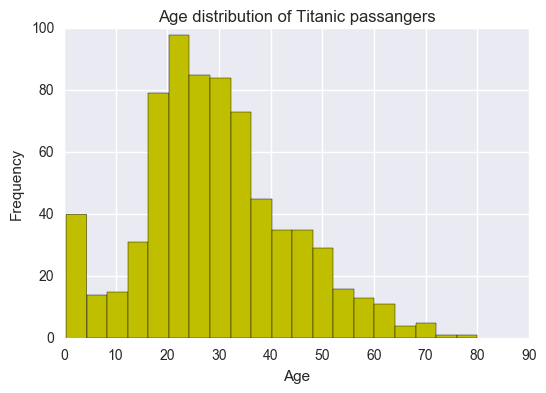

In [202]:
#Create histrogram of frequency distribution of age data
known_age_passengers["Age"].hist(bins=20, color="y")
plt.legend(prop={"size":15})
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age distribution of Titanic passangers')
plt.show()

In [203]:
#Show statistics of available age data
known_age_passengers["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

We can conclude following things from above presented table:
    * average age of the passangers was 29.6 years with standard deviations of 14.5
    * maximum passanger age was 80 years and minimum 3 moths
    

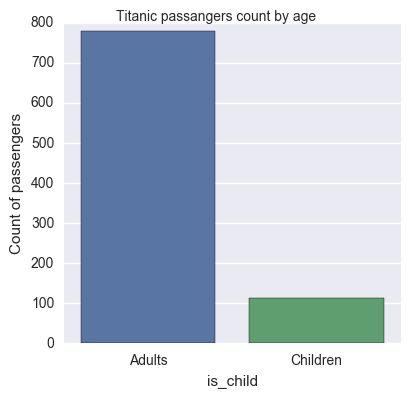

In [204]:
#Assesing if a passanger is less than 18 years old (then consider to be a child)
def is_child(passanger):
    if passanger < 18:
        return 1
    else:
        return 0

#Adding additonal column "is_child" in titanic_df Dataframe      
titanic_df["is_child"] = pd.Series(titanic_df["Age"].apply(is_child), index=titanic_df.index)

#Changing is_child columns to bool type
titanic_df.loc["is_child"] = titanic_df["is_child"].astype(bool)

#Mapping value 1 to Child and 0 to an Adult
titanic_df["is_child"]= titanic_df.is_child.map({1:'Children', 0:'Adults'})

#Creating plot of number of children and adults onboard of titanic
age_plot = sns.factorplot('is_child', data=titanic_df, kind='count')
age_plot.despine(left=True)
age_plot.set_ylabels("Count of passengers")
age_plot.fig.suptitle('Titanic passangers count by age')


In [205]:
#Number of adults and childrens 1:'Child', 0:'Adult'
titanic_df["is_child"].value_counts()

Adults      778
Children    113
Name: is_child, dtype: int64

There were 779 adults and 113 children onboard of titanic.

##### 4.2 Exploring sex data

Now i will explore Sex data. I will start with displaying statistics of sex data:

In [206]:
# Group series 
passengers_by_sex = titanic_df.groupby("Sex")
#Generate various summary statistics of 'Sex' data
passengers_by_sex.describe()

Age        Fare      PClass       ParCh  PassengerId  \
Sex                                                                         
female count  261.000000  314.000000  314.000000  314.000000   314.000000   
       mean    27.915709   44.479818    2.159236    0.649682   431.028662   
       std     14.110146   57.997698    0.857290    1.022846   256.846324   
       min      0.750000    6.750000    1.000000    0.000000     2.000000   
       25%           NaN   12.071875    1.000000    0.000000   231.750000   
       50%           NaN   23.000000    2.000000    0.000000   414.500000   
       75%           NaN   55.000000    3.000000    1.000000   641.250000   
       max     63.000000  512.329200    3.000000    6.000000   889.000000   
male   count  453.000000  577.000000  577.000000  577.000000   577.000000   
       mean    30.726645   25.523893    2.389948    0.235702   454.147314   
       std     14.678201   43.138263    0.813580    0.612294   257.486139   
       min      0.420000    0.000000    1.000000    0.000000     1.000000   
       25%           NaN    7.895800    2.000000    0.000000   222.000000   
       50%           NaN   10.500000    3.000000    0.000000   464.000000   
       75%           NaN   26.550000    3.000000    0.000000   680.000000   
       max     80.000000  512.329200    3.000000    5.000000   891.000000   

                   SibSp    Survived  
Sex                                   
female count  314.000000  314.000000  
       mean     0.694268    0.742038  
       std      1.156520    0.438211  
       min      0.000000    0.000000  
       25%      0.000000    0.000000  
       50%      0.000000    1.000000  
       75%      1.000000    1.000000  
       max      8.000000    1.000000  
male   count  577.000000  577.000000  
       mean     0.429809    0.188908  
       std      1.061811    0.391775  
       min      0.000000    0.000000  
       25%      0.000000    0.000000  
       50%      0.000000    0.000000  
       75%      0.000000    0.000000  
       max      8.000000    1.000000

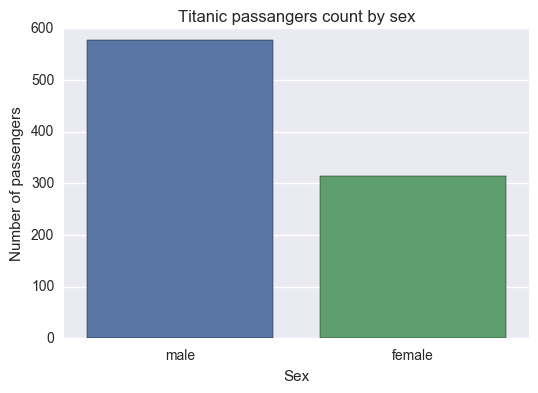

In [207]:
#Creating plot of number of male and female onboard of Titanic
titanic_class = sns.countplot(x="Sex", data=titanic_df)
titanic_class.set(xlabel='Sex', ylabel='Number of passengers', title = 'Titanic passangers count by sex')

In [208]:
# group the passengers that survived by gender
passengers_by_sex = titanic_df.groupby("Sex") 
# find total number of survived by gender
total = passengers_by_sex["Survived"].count()


In [209]:
print "There were ",total["female"], "females and", total["male"], "males onboard of Titanic ship."

There were  314 females and 577 males onboard of Titanic ship.


From the analysis of the sex data we can conclude that females had higher chance to survive Titanic catastrophe.

##### 4.3 Exploring class data

There were 3 classes of passangers on Titanic vessel. The Titanic's first class passenger list was a "who's who" of the rich and prominent of the upper class in 1912. Second classes passengers were leisure tourists, academics, members of the clergy and middle class English and American families. The third class passengers or steerage passengers left hoping to start new lives in the United States and Canada. 

Image below shows location of each class on the vessel:
    * 1st Class: blue
    * 2nd Class: yellow
    * 3rd class: red

In [210]:
#Load image from url
Image(url= "http://img07.deviantart.net/af19/i/2014/307/c/f/r_m_s__titanic_class_system_by_monroegerman-d787jna.png", width=900, height=900, unconfined=True)

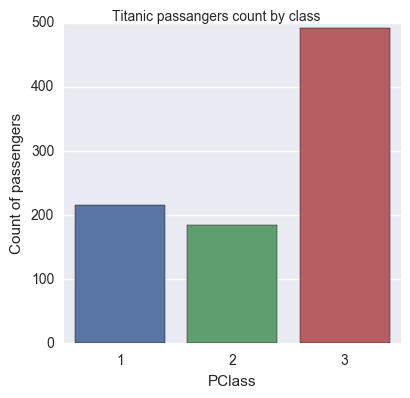

In [211]:
#Create histogram showing passanger count by class
class_plot = sns.factorplot('PClass', order=[1,2,3], data=titanic_df, kind='count')
class_plot.despine(left=True)
class_plot.set_ylabels("Count of passengers")
class_plot.fig.suptitle('Titanic passangers count by class')


In [212]:
#Display passanger count by Class
titanic_df["PClass"].value_counts()


3.0    491
1.0    216
2.0    184
Name: PClass, dtype: int64

We can observe that majority of passanger were 3rd class passangers.

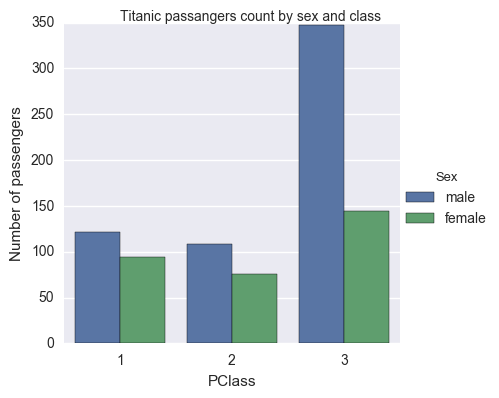

In [213]:

#Create histogram showing passanger count by class
class_plot = sns.factorplot('PClass', order=[1,2,3], hue = "Sex", data=titanic_df, kind='count')
class_plot.despine(left=True)
class_plot.set(xlabel='PClass', ylabel='Number of passengers')
class_plot.fig.suptitle('Titanic passangers count by sex and class')

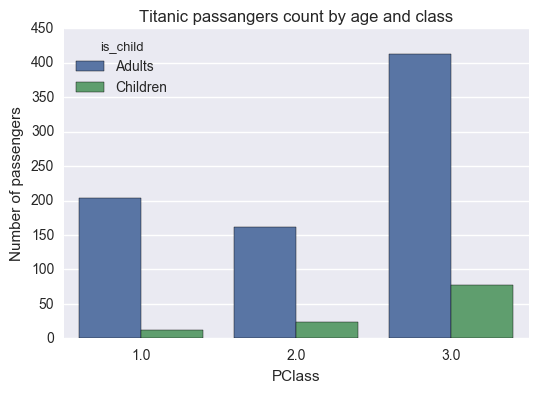

In [214]:
#Create plot showing adults and children count per class
titanic_class = sns.countplot(x="PClass", hue="is_child", data=titanic_df)
titanic_class.set(xlabel='PClass', ylabel='Number of passengers', title = 'Titanic passangers count by age and class')


We can see that a lot more men were on the third class.

##### 4.4 Exploring Embarked data

In [220]:
#Display passanger count by Embarked location
available_embarked_passengers["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

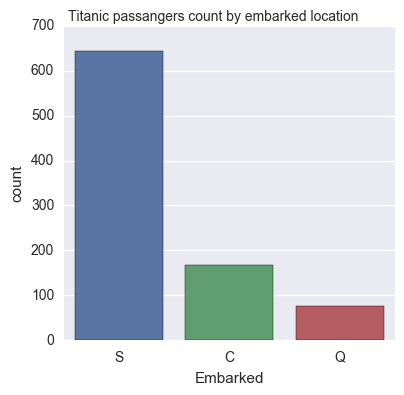

In [258]:
##Create histogam which shows number passangers by Embarked location
embarked_plot = sns.factorplot('Embarked', data = available_embarked_passengers, kind='count')
embarked_plot.despine(left=True)
embarked_plot.fig.suptitle('Titanic passangers count by embarked location', fontsize=10)


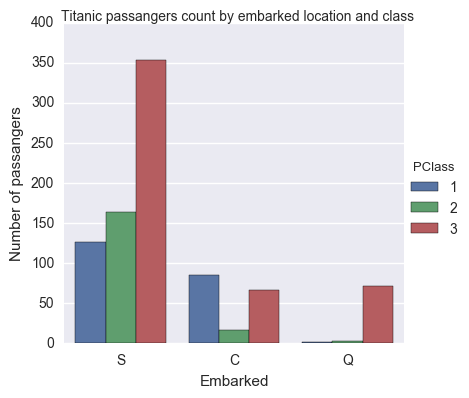

In [222]:
embarked_plot_class = sns.factorplot('Embarked', hue = "PClass", data=available_embarked_passengers, kind='count')
embarked_plot_class.despine(left=True)
embarked_plot_class.set_ylabels("Number of passangers")
embarked_plot_class.fig.suptitle('Titanic passangers count by embarked location and class')

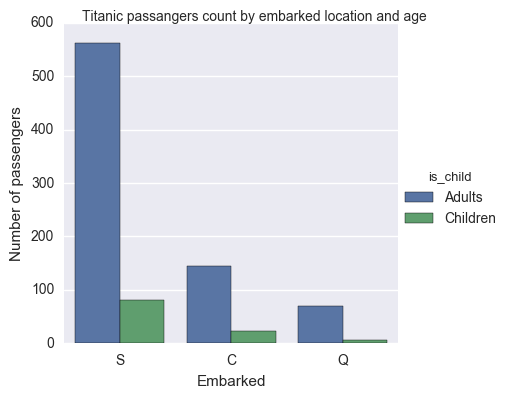

In [225]:
embarked_plot_is_child = sns.factorplot('Embarked', hue = "is_child", data=titanic_df, kind='count')
embarked_plot_is_child.despine(left=True)
embarked_plot_is_child.set_ylabels("Number of passengers")
embarked_plot_is_child.fig.suptitle('Titanic passangers count by embarked location and age')

## 5. Survival estimation  for passangers using  Age, Gender, PClass, Embarked, Deck data

After performing analysis of the data and number of calculations, i will asses the groups and their survivalbility. Moreover, I will adressed the questions I asked in the introduction, and I answered them based on the data, I also made some visualizations to help understanding the given numbers.

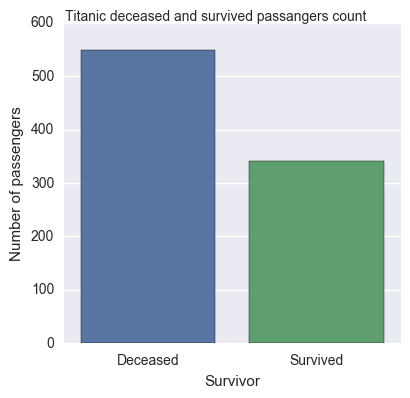

In [224]:
# Create plot showing deceased and survived passangers
titanic_df['Survivor']= titanic_df.Survived.map({0:'Deceased', 1:'Survived'})

survivor_plot = sns.factorplot('Survivor', data=titanic_df, kind='count', palette="deep")
survivor_plot.despine(left=True)
survivor_plot.set_ylabels("Number of passengers")
survivor_plot.fig.suptitle('Titanic deceased and survived passangers count', fontsize=10)

In [182]:
#Calculate number of survived and deceased passangers
titanic_df['Survivor'].value_counts()

Deceased    549
Survived    342
Name: Survivor, dtype: int64

#### Q1: Is there a difference on survival rate between passangers in regards to the age?

 [<matplotlib.text.Text at 0x1bcfe6a0>, <matplotlib.text.Text at 0x1c24e2b0>],

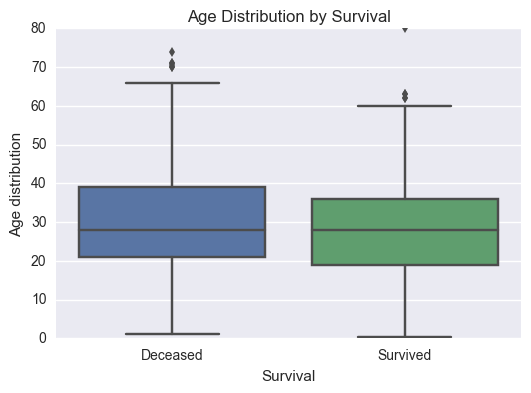

In [226]:
#Create boxplot showing distribution of age vs survival
survival_age_plot = sns.boxplot(data=titanic_df, x='Survived', y='Age')
survival_age_plot.set(title='Age Distribution by Survival',
            xlabel = 'Survival',
            ylabel = 'Age distribution',
            xticklabels = ['Deceased', 'Survived'])

In [52]:
#Display count of adults and children
titanic_df["is_child"].value_counts()

Adults      778
Children    113
Name: is_child, dtype: int64

In [227]:
# group the passengers that survived by is_child
passengers_by_is_child = titanic_df.groupby("is_child") 
# find total count
total = passengers_by_is_child["is_child"].count()
# find total count of survived
survived = passengers_by_is_child["Survived"].sum().astype(int)
# find total count of deceased
deceased = (total - survived).astype(int)
print "Survived by", survived
print " "
print "Deceased by", deceased

Survived by is_child
Adults      281
Children     61
Name: Survived, dtype: int32
 
Deceased by is_child
Adults      497
Children     52
dtype: int32


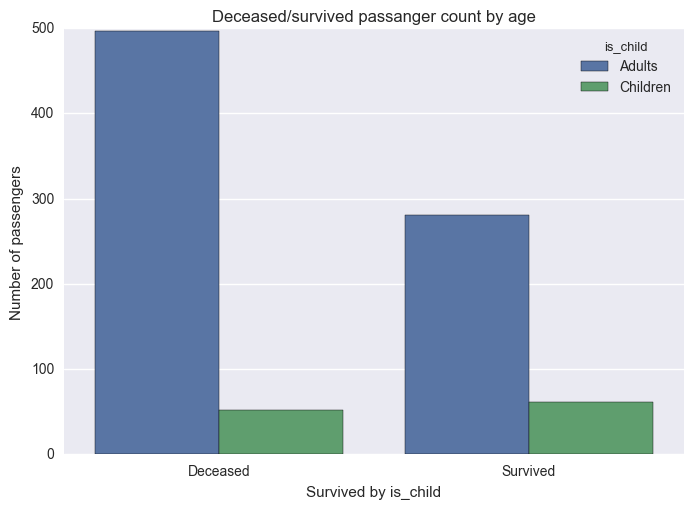

In [254]:
#Create histogram showing count of survived/deceased adults and children
survival_is_child_plot = sns.countplot(x="Survivor", hue="is_child", data=titanic_df)
survival_is_child_plot.set(xlabel='Survived by is_child', ylabel='Number of passengers', title = 'Deceased/survived passanger count by age')

<function matplotlib.pyplot.show>

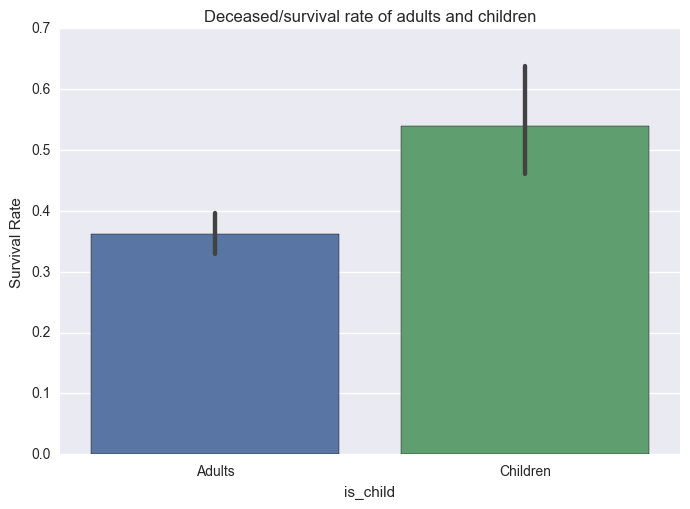

In [229]:
#Creating a bar plot of survived adults and children
survived_adults_children = sns.set(style="darkgrid")
survived_adults_children = sns.barplot(data=titanic_df, x="is_child", y="Survived", palette="deep",)
survived_adults_children.set(xlabel='is_child', ylabel='Survival Rate', title = 'Deceased/survival rate of adults and children')
sns.plt.show



In [230]:
#Create correlation function between two parameters x and y
def correlation(x, y):
    std_x = (x - x.mean()) / x.std(ddof=0)
    std_y = (y - y.mean()) / y.std(ddof=0)

    return (std_x * std_y).mean()

In [231]:
age = titanic_df['Age']
survival = titanic_df['Survived']
# Using correlation function show correlation between two variables - age and survival
print "Pearsons R for age vs. survival: ", correlation(age, survival)

Pearsons R for age vs. survival:  -0.0779826784139


The boxplot is showing us that the mean of survived and deceased passangers is very close to each other. Calculation of Pearsons R for age vs. survival doesn't show  that there is very clear corelation.

### Q2: Is there a difference on survival rate between passangers in regards to the sex?

In [232]:
passengers_by_sex = titanic_df.groupby("Sex")
passengers_by_sex.describe()

Age        Fare      PClass       ParCh  PassengerId  \
Sex                                                                         
female count  261.000000  314.000000  314.000000  314.000000   314.000000   
       mean    27.915709   44.479818    2.159236    0.649682   431.028662   
       std     14.110146   57.997698    0.857290    1.022846   256.846324   
       min      0.750000    6.750000    1.000000    0.000000     2.000000   
       25%           NaN   12.071875    1.000000    0.000000   231.750000   
       50%           NaN   23.000000    2.000000    0.000000   414.500000   
       75%           NaN   55.000000    3.000000    1.000000   641.250000   
       max     63.000000  512.329200    3.000000    6.000000   889.000000   
male   count  453.000000  577.000000  577.000000  577.000000   577.000000   
       mean    30.726645   25.523893    2.389948    0.235702   454.147314   
       std     14.678201   43.138263    0.813580    0.612294   257.486139   
       min      0.420000    0.000000    1.000000    0.000000     1.000000   
       25%           NaN    7.895800    2.000000    0.000000   222.000000   
       50%           NaN   10.500000    3.000000    0.000000   464.000000   
       75%           NaN   26.550000    3.000000    0.000000   680.000000   
       max     80.000000  512.329200    3.000000    5.000000   891.000000   

                   SibSp    Survived  
Sex                                   
female count  314.000000  314.000000  
       mean     0.694268    0.742038  
       std      1.156520    0.438211  
       min      0.000000    0.000000  
       25%      0.000000    0.000000  
       50%      0.000000    1.000000  
       75%      1.000000    1.000000  
       max      8.000000    1.000000  
male   count  577.000000  577.000000  
       mean     0.429809    0.188908  
       std      1.061811    0.391775  
       min      0.000000    0.000000  
       25%      0.000000    0.000000  
       50%      0.000000    0.000000  
       75%      0.000000    0.000000  
       max      8.000000    1.000000

<function matplotlib.pyplot.show>

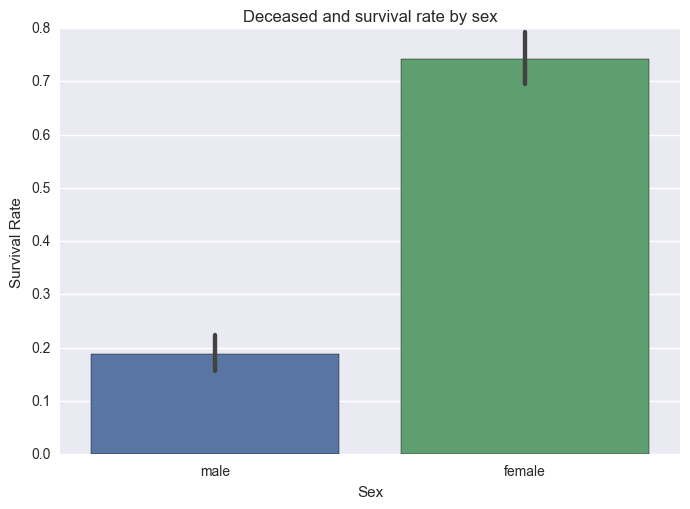

In [253]:
#Creating a bar plot of survived males and females
survived_male_female = sns.set(style="darkgrid")
survived_male_female = sns.barplot(data=titanic_df, x="Sex", y="Survived", palette="deep")
survived_male_female.set(xlabel='Sex', ylabel='Survival Rate', title = 'Deceased and survival rate by sex')
plt.show

In [234]:
# Find number of survived by gender
survived = passengers_by_sex["Survived"].sum().astype(int)
# Find number of deceased by gender
deceased = (total - survived)
print "Survived by", survived
print " "
print "Deceased by", deceased

Survived by Sex
female    233
male      109
Name: Survived, dtype: int32
 
Deceased by Adults     NaN
Children   NaN
female     NaN
male       NaN
dtype: float64


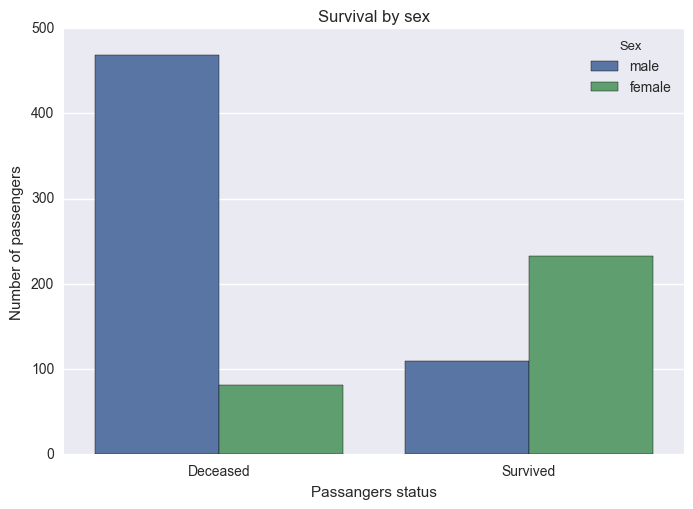

In [252]:
#Creating a bar plot displaying number of survived/deceased males and females
survived = passengers_by_sex["Survived"]
survival.sex_plot = sns.countplot(x="Survivor", hue="Sex", data=titanic_df)
survival.sex_plot.set(xlabel='Passangers status', ylabel='Number of passengers', title = 'Survival by sex')



In [236]:
survived = passengers_by_sex["Survived"].sum().astype(int)
# find total number of survived by gender
total = passengers_by_sex["Survived"].count()

In [237]:
percent_survived_females = (survived["female"] * 100) / total["female"]
print "Procent of survived females = ", percent_survived_females, "%"
print ""
#calculating % of survived males
percent_survived_males = (survived["male"] * 100) / total["male"]
print "Procent of survived males = ", percent_survived_males, "%"

Procent of survived females =  74 %

Procent of survived males =  18 %


From the analysis of the sex data we can conclude that females had much higher chance to survive Titanic catastrophe.

### Q3: Is there a difference on survival rate between passangers located in different classes?

In [238]:
passengers_by_class = titanic_df.groupby("PClass")
passengers_by_class.describe()

Age        Fare       ParCh  PassengerId       SibSp  \
PClass                                                                      
1.0    count  186.000000  216.000000  216.000000   216.000000  216.000000   
       mean    38.233441   84.154687    0.356481   461.597222    0.416667   
       std     14.802856   78.380373    0.693997   246.737616    0.611898   
       min      0.920000    0.000000    0.000000     2.000000    0.000000   
       25%           NaN   30.923950    0.000000   270.750000    0.000000   
       50%           NaN   60.287500    0.000000   472.000000    0.000000   
       75%           NaN   93.500000    0.000000   670.500000    1.000000   
       max     80.000000  512.329200    4.000000   890.000000    3.000000   
2.0    count  173.000000  184.000000  184.000000   184.000000  184.000000   
       mean    29.877630   20.662183    0.380435   445.956522    0.402174   
       std     14.001077   13.417399    0.690963   250.852161    0.601633   
       min      0.670000    0.000000    0.000000    10.000000    0.000000   
       25%           NaN   13.000000    0.000000   234.500000    0.000000   
       50%           NaN   14.250000    0.000000   435.500000    0.000000   
       75%           NaN   26.000000    1.000000   668.000000    1.000000   
       max     70.000000   73.500000    3.000000   887.000000    3.000000   
3.0    count  355.000000  491.000000  491.000000   491.000000  491.000000   
       mean    25.140620   13.675550    0.393075   439.154786    0.615071   
       std     12.495398   11.778142    0.888861   264.441453    1.374883   
       min      0.420000    0.000000    0.000000     1.000000    0.000000   
       25%           NaN    7.750000    0.000000   200.000000    0.000000   
       50%           NaN    8.050000    0.000000   432.000000    0.000000   
       75%           NaN   15.500000    0.000000   666.500000    1.000000   
       max     74.000000   69.550000    6.000000   891.000000    8.000000   

                Survived  
PClass                    
1.0    count  216.000000  
       mean     0.629630  
       std      0.484026  
       min      0.000000  
       25%      0.000000  
       50%      1.000000  
       75%      1.000000  
       max      1.000000  
2.0    count  184.000000  
       mean     0.472826  
       std      0.500623  
       min      0.000000  
       25%      0.000000  
       50%      0.000000  
       75%      1.000000  
       max      1.000000  
3.0    count  491.000000  
       mean     0.242363  
       std      0.428949  
       min      0.000000  
       25%      0.000000  
       50%      0.000000  
       75%      0.000000  
       max      1.000000

In [239]:
# group the passengers that survived by class
passengers_by_class = titanic_df.groupby("PClass") 
total = passengers_by_class["PClass"].count()

In [240]:

#Total count of passangers in PClass
print total
print""
#Count of survived passangers embarked in different classes
survived = passengers_by_class["Survived"].sum().astype(int)
print ""
deceased = (total - survived).astype(int)
print "Survived by", survived, 
print ""
print "Deceased by", deceased, 

PClass
1.0    216
2.0    184
3.0    491
Name: PClass, dtype: int64


Survived by PClass
1.0    136
2.0     87
3.0    119
Name: Survived, dtype: int32 
Deceased by PClass
1.0     80
2.0     97
3.0    372
dtype: int32


As we can see survived rate differs quite a lot between different classes. The first class passengers had the highest survival rate (63%), followed by the 2nd class (47%) and the 3rd class (24%).

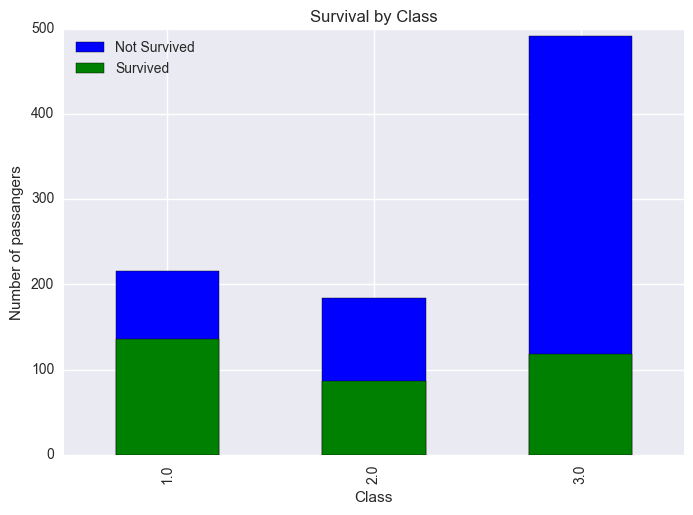

In [241]:
#Create plot which shows survived and deceased passanger count per class
survival.class_plot_total = passengers_by_class["Survived"].count()
survived = passengers_by_class["Survived"].sum()
survival.class_plot_total.plot(kind="bar", color="b", label="Not Survived")
survived.plot(kind="bar", color="g", label="Survived")
plt.xlabel('Class')
plt.ylabel('Number of passangers')
plt.title('Survival by Class')
plt.legend(loc=2)

As we can remember from the exploration part there were more men than female in the third class, which in the end limited the chances of survival of the passangers in the third class.

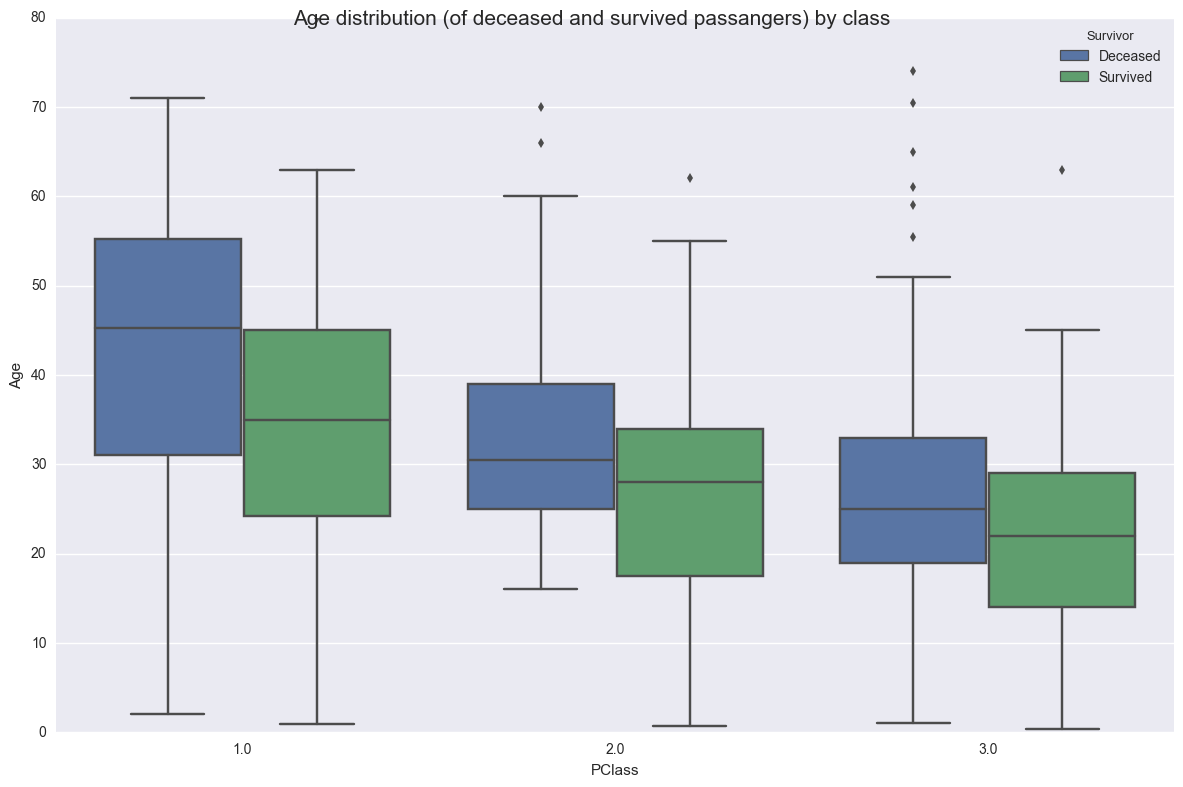

In [246]:
#create boxplot of age distribution in classes 1,2,3 vs, survived and deceased


boxplot = sns.factorplot(kind='box',        # Boxplot
               y='Age',           # Y-axis - values for boxplot
               x='PClass',        # X-axis - first factor
               hue='Survivor',    # Second factor denoted by color
               data=titanic_df,      # Dataframe 
               size=8,            # Figure size (x100px)      
               aspect=1.5,        # Width = size * aspect 
               legend_out=False)
boxplot.fig.suptitle('Age distribution (of deceased and survived passangers) by class', fontsize=15)

Third-class and crew cabins were located in the hold, while promenade areas were on lower decks and in the quarter. They were separated from the promenade decks for wealthier passengers by special partitions – staircases leading to upper decks had metal gates, the keys to which were kept by stewards. Some sources claim that these partitions were required by American immigration laws at the time.The majority of passengers on the Titanic were emigrants. Only 25 percent of the Titanic’s third-class passengers survived, with small percentage of male. On the other hand we can observe high survival rate in the passangers in the first class. It also has to be taken into the account that there were quite big precent of woman in the first class.

We can also observe from above displayed boxplots that younger people had slighty better chance to survive in classes 1,2,3.

Third class was the group hardest hit by the disaster and experiencing the greatest loss of life. According to many sources the reasons for could be: first and second class given more importance, many did not understand the true magnitude of the disaster right after the collision with the Titanic, at least some of the third class gates remained locked, and many of the passengers that were non-English speaking did not understand.

### Q4: Is there a difference on survival rate between location of the embarkment of the passangers?

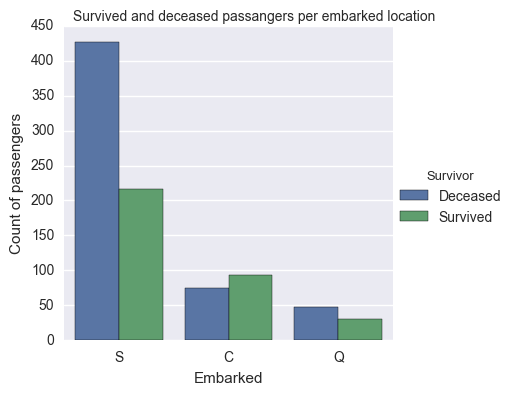

In [247]:
#Create plot which shows deceased and survived passangers count per embarked location
survival.embarked_plot = sns.factorplot('Embarked', hue = "Survivor", data=titanic_df, kind='count')
survival.embarked_plot.despine(left=True)
survival.embarked_plot.set_ylabels("Count of passengers")
survival.embarked_plot.fig.suptitle('Survived and deceased passangers per embarked location', fontsize=10)


Note:  C = Cherbourg; Q = Queenstown; S = Southampton

In [248]:
# group the passengers that survived by gender
passengers_by_embarked = titanic_df.groupby("Embarked") 
# find the values and labels for the area circles
total = passengers_by_embarked["Embarked"].count()

#Total count of passangers embarked in Cherbourg, Queenstown, Southampton
print total
print""
#Count of survived passangers embarked in Cherbourg, Queenstown, Southampton
survived = passengers_by_embarked["Survived"].sum().astype(int)
print ""
deceased = (total - survived).astype(int)
print "Survived by", survived, 
print ""
#Count of deceased passangers embarked in Cherbourg, Queenstown, Southampton
print ""
print "Deceased by", deceased, 

Embarked
C    168
Q     77
S    644
Name: Embarked, dtype: int64


Survived by Embarked
C     93
Q     30
S    217
Name: Survived, dtype: int32 

Deceased by Embarked
C     75
Q     47
S    427
dtype: int32


In [249]:
#calculating % of survived by embarked location
percent_survived_embarked = (survived["C"] * 100) / total["C"]
print "Procent of survived passangers embarked in Cherbourg = ", percent_survived_embarked, "%"
print ""
percent_survived_embarked = (survived["Q"] * 100) / total["Q"]
print "Procent of survived passangers embarked in Queenstown  = ", percent_survived_embarked, "%"
print ""
percent_survived_embarked = (survived["S"] * 100) / total["S"]
print "Procent of survived passangers embarked in Southampton = ", percent_survived_embarked, "%"


Procent of survived passangers embarked in Cherbourg =  55 %

Procent of survived passangers embarked in Queenstown  =  38 %

Procent of survived passangers embarked in Southampton =  33 %


### Q5: Is there a difference on survival rate between passangers located on different decks?

In [250]:
#known_cabin_passengers["Deck"].descibe()

# group the passengers that survived by gender
passengers_by_deck = known_cabin_passengers.groupby("Deck") 
# find the values and labels for the area circles
total = passengers_by_deck["Deck"].count()

#Total count of passangers embarked in Cherbourg, Queenstown, Southampton
print total
print""
#Count of survived passangers embarked in Cherbourg, Queenstown, Southampton
survived = passengers_by_deck["Survived"].sum().astype(int)
print ""
deceased = (total - survived).astype(int)
print "Survived by", survived, 
print ""
#Count of deceased passangers embarked in Cherbourg, Queenstown, Southampton
print ""
print "Deceased by", deceased, 

Deck
A    15
B    64
C    71
D    34
E    33
F    13
G     7
T     1
Name: Deck, dtype: int64


Survived by Deck
A     7
B    48
C    41
D    26
E    25
F     8
G     2
T     0
Name: Survived, dtype: int32 

Deceased by Deck
A     8
B    16
C    30
D     8
E     8
F     5
G     5
T     1
dtype: int32


In [251]:
#calculating % of survived by embarked location
    
percent_survived_deckA = (survived["A"] * 100) / total["A"]
print "Procent of survived passangers on deck A = ", percent_survived_deckA, "%"
print ""
percent_survived_deckB = (survived["B"] * 100) / total["B"]
print "Procent of survived passangers on deck B = ", percent_survived_deckB, "%"
print ""
percent_survived_deckC = (survived["C"] * 100) / total["C"]
print "Procent of survived passangers on deck C = ", percent_survived_deckC, "%"
print ""
percent_survived_deckD = (survived["D"] * 100) / total["D"]
print "Procent of survived passangers on deck C = ", percent_survived_deckD, "%"
print ""
percent_survived_deckD = (survived["D"] * 100) / total["D"]
print "Procent of survived passangers on deck D = ", percent_survived_deckD, "%"
print ""
percent_survived_deckE = (survived["E"] * 100) / total["E"]
print "Procent of survived passangers on deck E = ", percent_survived_deckE, "%"
print ""
percent_survived_deckF = (survived["F"] * 100) / total["F"]
print "Procent of survived passangers on deck F = ", percent_survived_deckF, "%"

#No caluclation for Deck T as only 1 passanger present on that deck

Procent of survived passangers on deck A =  46 %

Procent of survived passangers on deck B =  75 %

Procent of survived passangers on deck C =  57 %

Procent of survived passangers on deck C =  76 %

Procent of survived passangers on deck D =  76 %

Procent of survived passangers on deck E =  75 %

Procent of survived passangers on deck F =  61 %


From above done analysis we can see that the least chance of survival had passngers located on deck A.

## Conclusions

While using the Titanic dataset I found several limitations that made making deeper analysis more difficult and in some cases unreliable. The limitation i had to face are following:
1. Big number of data was missing. We had available data of only 891 passangers from 2224 that were present on titanic. This represents only 40% of the total passangers.
2. From 891 passangers so much as 708 passangers had at least one type of data missing (e.g age). This mean 79% of data is missing in the provided dataset. This is quite a big number and represents
3. Assesing age and cabin data turned out to be challenging as 177 and 687 data points were missing respectively in those columns.  
4. There might be other factors that have impacted the chances of survival. It was reported in multiple articles that gates separating 3rd class were mostly closed and thus they could not escape so easily to the lifeboats.
5. Deck data might be not correct due to the fact that it's impossible to say where the passangers were at the time of the catastrophe. The same would apply to cabin data which i did not analyzed.

Main conclusions:


1. The number of surviving females (74%) exceeded the number of surviving males (18%) aboard RMS Titanic.
2. The number of children survived in the disaster significantly exceeded the number of survived adults.
3. Passsengers with age between 20 and 35 tended to survive the most. This is caused by the fact that the number of passanger in this age group was higher so i can not say that there is an actual correlation between age and survival rate.
4. Passangers in the first class had higher chance of survival than from class two and three. Survival precent of passangers in classes were folowing: 1st: 63%, 2nd Class 47%,  3rd Class 24%.
5. Passangers embarked in Cherbourg had higher chances of survival than passangers embarked in Queenstown or Southampton.
6. Passangers located on Deck A had the lowest chances of survival.

I think there is still a room for further analysis which due to the time constraint i did not manage to perform. Those would be folowing:
1. Asses if the people traveling with family(wife, husband, children) had higher chance to survive.
2. Asses if the size of family had a influence on chance of survival.
3. Asses distribution of the lifeboats on the titanic in comparision of survival on different decks/cabins.
4. Performing statistical testing to  validating results in order to strengten validation of the correlational observations.

## References

Additonal informations:

* https://www.kaggle.com/c/titanic
* https://en.wikipedia.org/wiki/Camel_case
* https://en.wikipedia.org/wiki/Sinking_of_the_RMS_Titanic
* https://sputniknews.com/analysis/20120329172424735/
* https://alookthrutime.wordpress.com/2012/04/13/third-class-life-on-the-titanic/
* https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient

Plots:
* https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.barplot.html
* https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.factorplot.html
* http://stackoverflow.com/questions/25284859/grouping-boxplots-in-seaborn-when-input-is-a-dataframe
* http://www.alexsalo.xyz/pretty-boxplots-python-matplotlib-pandas-seaborn/

Pandas:
* http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.count.html
* http://stackoverflow.com/questions/23317342/pandas-dataframe-split-column-into-multiple-columns-right-align-inconsistent-c
* http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html

Images:
* https://upload.wikimedia.org/wikipedia/commons/e/e1/Titanic_under_construction.jpg
* http://img07.deviantart.net/af19/i/2014/307/c/f/r_m_s__titanic_class_system_by_monroegerman-d787jna.png